In [121]:
%matplotlib inline
from context import spew
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
from geopandas import GeoDataFrame
import re
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)

In [143]:
trial = 4

FTT = [288, 3600]
median = [-3, 3]
kays = [0,1]
K = [0.5,1000]
eruptions = []
params = []
grid_label = {
    "small_grid": "Small grid",
    "large_grid": "Large Grid"
}
for f in FTT:
    for k in kays:
        for m in median:
            filename = '../../data/sim_trial_%s/ftt_%s_k_%s_gs_%s_.txt' \
                       % (str(trial), str(f), str(k), str(m))
            print(filename)
            params += [(f, K[k], m)]
            eruptions += [spew.core.eruption.Eruption(data=filename, 
                                                      vent=Point(532290, 1382690), 
                                                      test=False)]


../../data/sim_trial_4/ftt_288_k_0_gs_-3_.txt
../../data/sim_trial_4/ftt_288_k_0_gs_3_.txt
../../data/sim_trial_4/ftt_288_k_1_gs_-3_.txt
../../data/sim_trial_4/ftt_288_k_1_gs_3_.txt
../../data/sim_trial_4/ftt_3600_k_0_gs_-3_.txt
../../data/sim_trial_4/ftt_3600_k_0_gs_3_.txt
../../data/sim_trial_4/ftt_3600_k_1_gs_-3_.txt
../../data/sim_trial_4/ftt_3600_k_1_gs_3_.txt


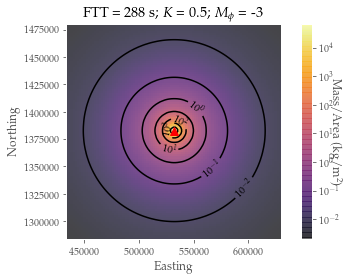

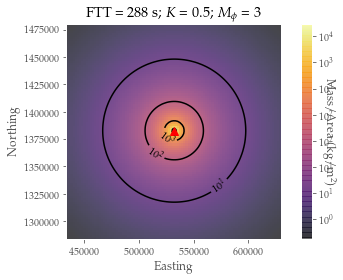

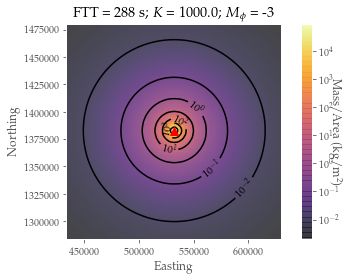

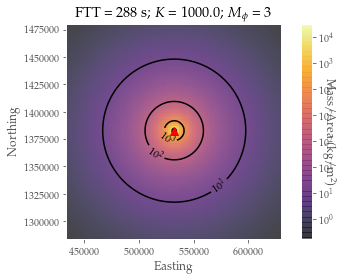

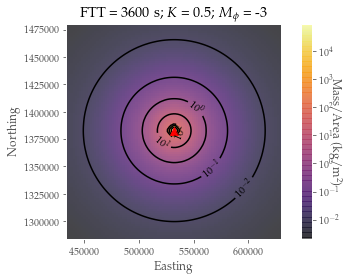

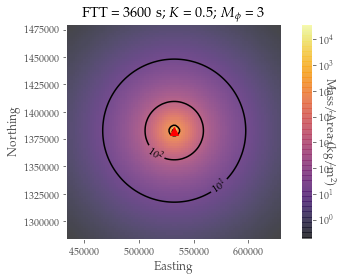

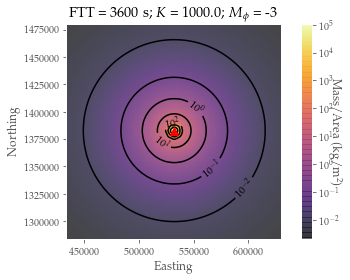

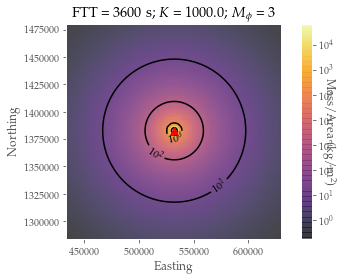

In [152]:
for i in range(8):
    eruptions[i].plot_contour(background='gradient', cmap="inferno", 
                              title="FTT = %d s; $K$ = %.1f; $M_{\phi}$ = %d" \
                              % params[i],
                              line_colors="k", cbar_label="Mass/Area (kg/m$^2$)")
    plt.grid(False)
    plt.tight_layout()
    plt.savefig("fig_%d.png"%i, dpi=200, format='png')

In [149]:

table = []
for i in range(8):
    mass = (2000**2) * eruptions[i].df["MassArea"]
    input_mass = 1882315000000
    tot_mass = mass.sum()
    mass_perc = (tot_mass/input_mass)*100
    table += [list(params[i]) + list([tot_mass]) + list([mass_perc])]
   
pd.DataFrame(table, columns=["FTT (s)", "K", "M (phi)", "Total Mass (kg)", "Mass loss/gain (%)"])

,FTT (s),K,M (phi),Total Mass (kg),Mass loss/gain (%)
0,288,0.5,-3,1.468206e+12,78.000025
1,288,0.5,3,1.735182e+12,92.183419
2,288,1000.0,-3,1.657178e+12,88.039370
3,288,1000.0,3,1.741754e+12,92.532534
4,3600,0.5,-3,1.135790e+12,60.340046
5,3600,0.5,3,1.345717e+12,71.492654
6,3600,1000.0,-3,1.697533e+12,90.183255
7,3600,1000.0,3,1.766513e+12,93.847889


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b5b080dc88>)

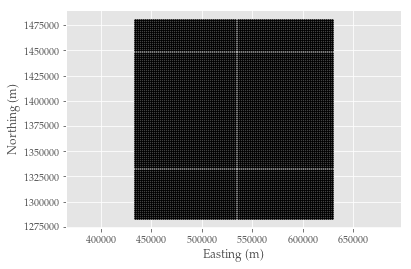

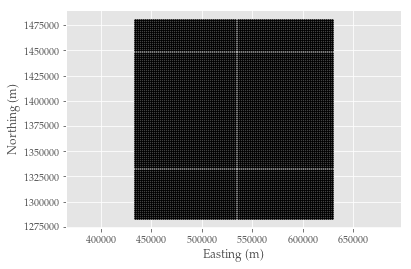

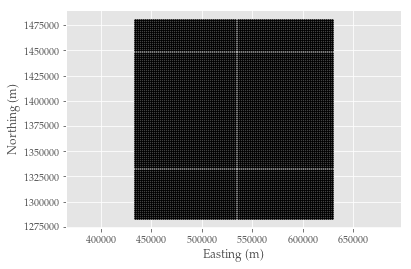

In [138]:
len(eruptions[3].df)

10201